<a href="#top">Back to Top</a>
<a id="task2Model1"></a>
## Task 2 - Classification - Model 3 - Logistic Regression (2)

Goal: 
The goal of this logistic regression model is to leverage binary classification that will classify whether or not a crime is violent or non-violent. The reason for this model is to give insights to for police within the NYC boroughs to have an idea of the factors that are common within crimes in their jurisdictions. 

Our belief is that this model will allow for an opportunity to enhance policing efforts by essentially giving them enhanced intuition on how to prepare or deal with a crime before concluding their investigation. This model should also be able to point out key characteristics within violent or non-violent crimes that can aid in the most adequate form of requirement gathering on a per case basis (increased staffing during certain times of day, increased policing in certain areas, etc..).

### Data Preparation Part 1

We wanted to explore an alternative method using minimal manipulation exclusive of scaling variables and up/down sampling. The only manipulation we will be leveraging is dummy variables for our categorical predictors.

Below are the set of all categorical predictors that we have chosen to dummy:  
-JURIS_DESC  
-BORO_NM  
-LOC_OF_OCCUR_DESC  
-ADDR_PCT_CD  
-PREM_TYP_DESC  
-Day_Name  
-Month  
-Duration_lbl  
-Season  
-Daytime

Below are the variables we left unchanged:  
-Duration  
-Duration_to_PD  
-Day  
-Year  
-GeoCell  
-GeoCell_X  
-GeoCell_Y

Our target variable denoted as "y" has levels of "0" = non-violent and "1" = non-violent  

Here we are loading in our initial libraries for basic data manipulation and pre-processing.

In [ ]:
#Python 3.7.2
#Import initial libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
%config IPCompleter.greedy=True

In this portion we are reading in two CSV files:  
1. Our training and test data set  
2. Our 10% holdout set of the original data  

The reason we decided to go with a holdout set is to really make sure we are both building our a robust model, and also testing that model outside of the training and test split given to ensure maximum effectiveness. It also gives us an opportunity to test the model on independent data since it wasn't included in any of our train/test splits.

In [2]:
#Read in CSV
df = pd.read_csv(r"C:\Users\Aurian\Documents\SMU_LAB_ML1\NewYorkCityCrimes2015\Mini_Lab_Individual_Files\Brian\Data\Training_and_Test_Set.csv")
df_holdout = pd.read_csv(r"C:\Users\Aurian\Documents\SMU_LAB_ML1\NewYorkCityCrimes2015\Mini_Lab_Individual_Files\Brian\Data\Hold_Out_Set.csv")

### Data Preparation Part 2

Here we are running some shape and info methods to get an idea of the predictors we are working with

In [3]:
#Check dimensions
print(df.shape)
print(df_holdout.shape)

#Check data types
print(df.info())

#Check Head
df.head()

(528873, 18)
(58764, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528873 entries, 0 to 528872
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   JURIS_DESC         528873 non-null  object 
 1   BORO_NM            528873 non-null  object 
 2   ADDR_PCT_CD        528873 non-null  float64
 3   LOC_OF_OCCUR_DESC  528873 non-null  object 
 4   PREM_TYP_DESC      528873 non-null  object 
 5   Day_Name           528873 non-null  object 
 6   Duration           528873 non-null  float64
 7   Duration_to_PD     528873 non-null  float64
 8   Month              528873 non-null  object 
 9   Day                528873 non-null  float64
 10  Year               528873 non-null  float64
 11  Duration_lbl       528873 non-null  object 
 12  Season             528873 non-null  object 
 13  Daytime            528873 non-null  object 
 14  GeoCell            528873 non-null  float64
 15  GeoCell_X          528873 

,JURIS_DESC,BORO_NM,ADDR_PCT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,Day_Name,Duration,Duration_to_PD,Month,Day,Year,Duration_lbl,Season,Daytime,GeoCell,GeoCell_X,GeoCell_Y,y
0,N.Y. POLICE DEPT,STATEN ISLAND,120.0,INSIDE,COMMERCIAL BUILDING,Friday,3.0,0.0,September,5.0,2014.0,Short,Fall,Morning,23.0,3.0,3.0,0
1,N.Y. POLICE DEPT,STATEN ISLAND,121.0,INSIDE,RESIDENCE-HOUSE,Sunday,1.0,0.0,December,27.0,2015.0,Short,Winter,Day,23.0,3.0,3.0,1
2,N.Y. POLICE DEPT,BRONX,43.0,INSIDE,RESIDENCE - APT. HOUSE,Sunday,14.0,171.0,September,1.0,2013.0,Medium,Fall,Night,78.0,8.0,8.0,0
3,N.Y. POLICE DEPT,BROOKLYN,75.0,INSIDE,RESIDENCE-HOUSE,Friday,6.0,28.0,October,10.0,2014.0,Short,Fall,Day,47.0,7.0,5.0,0
4,N.Y. POLICE DEPT,MANHATTAN,6.0,FRONT OF,STREET,Sunday,1.0,0.0,September,28.0,2014.0,Short,Fall,Early Morning,55.0,5.0,6.0,0


Now we are checking the value counts of our target variable within each of our two datasets

In [4]:
#Check out target var
print(df.y.value_counts())
print(df_holdout.y.value_counts())

0    365333
1    163540
Name: y, dtype: int64
0    40568
1    18196
Name: y, dtype: int64


Here we wanted to separate the categorical vs continuous variables to allow for a more clean way to see which variables we want to manipulate

In [5]:
#Separate out cont. and cat. columns

cat_col = ['JURIS_DESC','BORO_NM','LOC_OF_OCCUR_DESC','ADDR_PCT_CD','PREM_TYP_DESC','Day_Name','Month','Duration_lbl','Season','Daytime']
num_col = ['Duration','Duration_to_PD','Day','Year','GeoCell','GeoCell_X','GeoCell_Y']

Below we are creating our dummies variables and concatenating them back to a new dataframe that we will use moving forward to do our modeling.  

*Please Note*: this dummy variable section is the only manipulation we will be doing with our base predictors

In [6]:
#Create dummies for Train/Test data set
for var in cat_col:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(df[var], prefix=var)
    df1=df.join(cat_list)
    df=df1
    
cat_col = ['JURIS_DESC','BORO_NM','LOC_OF_OCCUR_DESC','ADDR_PCT_CD','PREM_TYP_DESC','Day_Name','Month','Duration_lbl','Season','Daytime']
data_vars=df.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_col]

#Create new df with new vars
newdf = df[to_keep]
newdf.columns.values

array(['Duration', 'Duration_to_PD', 'Day', 'Year', 'GeoCell',
       'GeoCell_X', 'GeoCell_Y', 'y', 'JURIS_DESC_AMTRACK',
       'JURIS_DESC_DEPT OF CORRECTIONS', 'JURIS_DESC_HEALTH & HOSP CORP',
       'JURIS_DESC_LONG ISLAND RAILRD', 'JURIS_DESC_METRO NORTH',
       'JURIS_DESC_N.Y. HOUSING POLICE', 'JURIS_DESC_N.Y. POLICE DEPT',
       'JURIS_DESC_N.Y. STATE PARKS', 'JURIS_DESC_N.Y. STATE POLICE',
       'JURIS_DESC_N.Y. TRANSIT POLICE',
       'JURIS_DESC_NEW YORK CITY SHERIFF OFFICE', 'JURIS_DESC_NYC PARKS',
       'JURIS_DESC_NYS DEPT TAX AND FINANCE', 'JURIS_DESC_OTHER',
       'JURIS_DESC_POLICE DEPT NYC', 'JURIS_DESC_PORT AUTHORITY',
       'JURIS_DESC_STATN IS RAPID TRANS',
       'JURIS_DESC_TRI-BORO BRDG TUNNL', 'JURIS_DESC_U.S. PARK POLICE',
       'BORO_NM_BRONX', 'BORO_NM_BROOKLYN', 'BORO_NM_MANHATTAN',
       'BORO_NM_QUEENS', 'BORO_NM_STATEN ISLAND',
       'LOC_OF_OCCUR_DESC_FRONT OF', 'LOC_OF_OCCUR_DESC_INSIDE',
       'LOC_OF_OCCUR_DESC_OPPOSITE OF', 'LOC_OF_OCCUR_

Here we are performing the same exact categorical manipulation as above, but for the holdout dataset

In [7]:
### Create same manipulation on holdout set
#Separate out cont. and cat. columns
cat_col = ['JURIS_DESC','BORO_NM','LOC_OF_OCCUR_DESC','ADDR_PCT_CD','PREM_TYP_DESC','Day_Name','Month','Duration_lbl','Season','Daytime']
num_col = ['Duration','Duration_to_PD','Day','Year','GeoCell','GeoCell_X','GeoCell_Y']

#Create dummies for Train/Test data set
for var in cat_col:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(df_holdout[var], prefix=var)
    df_holdout1=df_holdout.join(cat_list)
    df_holdout=df_holdout1
    
cat_col = ['JURIS_DESC','BORO_NM','LOC_OF_OCCUR_DESC','ADDR_PCT_CD','PREM_TYP_DESC','Day_Name','Month','Duration_lbl','Season','Daytime']
data_vars=df_holdout.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_col]

#Create new df with new vars
newdf_holdout = df_holdout[to_keep]
newdf_holdout.columns.values

array(['Duration', 'Duration_to_PD', 'Day', 'Year', 'GeoCell',
       'GeoCell_X', 'GeoCell_Y', 'y', 'JURIS_DESC_AMTRACK',
       'JURIS_DESC_DEPT OF CORRECTIONS', 'JURIS_DESC_HEALTH & HOSP CORP',
       'JURIS_DESC_LONG ISLAND RAILRD', 'JURIS_DESC_METRO NORTH',
       'JURIS_DESC_N.Y. HOUSING POLICE', 'JURIS_DESC_N.Y. POLICE DEPT',
       'JURIS_DESC_N.Y. STATE PARKS', 'JURIS_DESC_N.Y. STATE POLICE',
       'JURIS_DESC_NEW YORK CITY SHERIFF OFFICE', 'JURIS_DESC_NYC PARKS',
       'JURIS_DESC_NYS DEPT TAX AND FINANCE', 'JURIS_DESC_OTHER',
       'JURIS_DESC_POLICE DEPT NYC', 'JURIS_DESC_PORT AUTHORITY',
       'JURIS_DESC_TRI-BORO BRDG TUNNL', 'JURIS_DESC_U.S. PARK POLICE',
       'BORO_NM_BRONX', 'BORO_NM_BROOKLYN', 'BORO_NM_MANHATTAN',
       'BORO_NM_QUEENS', 'BORO_NM_STATEN ISLAND',
       'LOC_OF_OCCUR_DESC_FRONT OF', 'LOC_OF_OCCUR_DESC_INSIDE',
       'LOC_OF_OCCUR_DESC_OPPOSITE OF', 'LOC_OF_OCCUR_DESC_REAR OF',
       'ADDR_PCT_CD_1.0', 'ADDR_PCT_CD_5.0', 'ADDR_PCT_CD_6.0',
    

### Modeling and Evaluation 1

*Please Note*: As stated above in previous models, we are running a tree-based classifier as our feature selection and leveraging gini importance to assess which features are best. We understand the nuances related to using tree-based classifiers on dummy variables; however, it is imperative to know from an interpretation standpoint that we need our categorical variables to be dummies - specific levels of a categorical predictor are very informative for our problem at hand and will be leveraged as such moving forward.  

Here we will load in our modeling and feature selection libraries to start working on building out our logistic regression model. We will also split out our predictors and target variable into their respected X and y alias.

In [54]:
#Random Forest Feature Selection
from sklearn.ensemble.forest import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

#Create X and y
X = newdf.drop(['y'], axis = 1)
y = newdf[['y']]

#Create splits 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Here we are using the random forest classifier as a feature selection technique and fitting it as such

In [46]:
## Testing out selectfrommodel class - most likely will not move forward since syntax is less intuitive vs sklearn modules
#Set RF Class
feats = SelectFromModel(RandomForestClassifier(n_estimators = 100))
feats.fit(X_train, y_train.values.ravel())

SelectFromModel(estimator=RandomForestClassifier())

This method returns an array of all the features that are most important based on the average gini importance. If the gini importance of a predictor is greater than the mean total gini importance, then that predictor will stay. If not, the predictor will be deemed as "False" and not included.

In [47]:
#Which features are most important
feats.get_support()

array([ True,  True,  True,  True,  True,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False,

Here we index'd the training columns by the boolean array above. Then we printed the columns that were best from our random forest classifier. Lastly, we assigned those columns to the "good_cols" variable.

In [48]:
#List of features that are most important
selected_feats= X_train.columns[(feats.get_support())]
print(len(selected_feats))
print(selected_feats)

#Store columns for later use
good_cols = ['Duration', 'Duration_to_PD', 'Day', 'Year', 'GeoCell', 'GeoCell_X',
       'GeoCell_Y', 'BORO_NM_MANHATTAN', 'LOC_OF_OCCUR_DESC_FRONT OF',
       'LOC_OF_OCCUR_DESC_INSIDE', 'PREM_TYP_DESC_CHAIN STORE',
       'PREM_TYP_DESC_DEPARTMENT STORE',
       'PREM_TYP_DESC_RESIDENCE - APT. HOUSE', 'PREM_TYP_DESC_RESIDENCE-HOUSE',
       'PREM_TYP_DESC_STREET', 'Day_Name_Friday', 'Day_Name_Monday',
       'Day_Name_Saturday', 'Day_Name_Sunday', 'Day_Name_Thursday',
       'Day_Name_Tuesday', 'Day_Name_Wednesday', 'Month_April', 'Month_August',
       'Month_December', 'Month_February', 'Month_January', 'Month_July',
       'Month_June', 'Month_March', 'Month_May', 'Month_November',
       'Month_October', 'Month_September', 'Duration_lbl_Long',
       'Duration_lbl_Medium', 'Duration_lbl_Short', 'Season_Fall',
       'Season_Spring', 'Season_Summer', 'Season_Winter', 'Daytime_Day',
       'Daytime_Early Morning', 'Daytime_Evening', 'Daytime_Late Night',
       'Daytime_Morning', 'Daytime_Night']

47
Index(['Duration', 'Duration_to_PD', 'Day', 'Year', 'GeoCell', 'GeoCell_X',
       'GeoCell_Y', 'BORO_NM_MANHATTAN', 'LOC_OF_OCCUR_DESC_FRONT OF',
       'LOC_OF_OCCUR_DESC_INSIDE', 'PREM_TYP_DESC_CHAIN STORE',
       'PREM_TYP_DESC_DEPARTMENT STORE',
       'PREM_TYP_DESC_RESIDENCE - APT. HOUSE', 'PREM_TYP_DESC_RESIDENCE-HOUSE',
       'PREM_TYP_DESC_STREET', 'Day_Name_Friday', 'Day_Name_Monday',
       'Day_Name_Saturday', 'Day_Name_Sunday', 'Day_Name_Thursday',
       'Day_Name_Tuesday', 'Day_Name_Wednesday', 'Month_April', 'Month_August',
       'Month_December', 'Month_February', 'Month_January', 'Month_July',
       'Month_June', 'Month_March', 'Month_May', 'Month_November',
       'Month_October', 'Month_September', 'Duration_lbl_Long',
       'Duration_lbl_Medium', 'Duration_lbl_Short', 'Season_Fall',
       'Season_Spring', 'Season_Summer', 'Season_Winter', 'Daytime_Day',
       'Daytime_Early Morning', 'Daytime_Evening', 'Daytime_Late Night',
       'Daytime_Morning', 'Day

Here we want to index out both our data sets with their appropriate X y splits with the good columns above

In [49]:
#Set the right columns
X_train=X_train[good_cols]

X_test = X_test[good_cols]

X_holdout=newdf_holdout[good_cols]
y_holdout=newdf_holdout[['y']]

Here we are running the same random forest classifier and fitting it to a new alias to create a visual representation of feature importance depicted below

In [13]:
#Set RF Class
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(X_train, y_train.values.ravel())

RandomForestClassifier()

Here is the function to show the visual representation of our features by gini importance

In [14]:
#Function for plotting feature importance
import seaborn as sns
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

Create feature importance plot

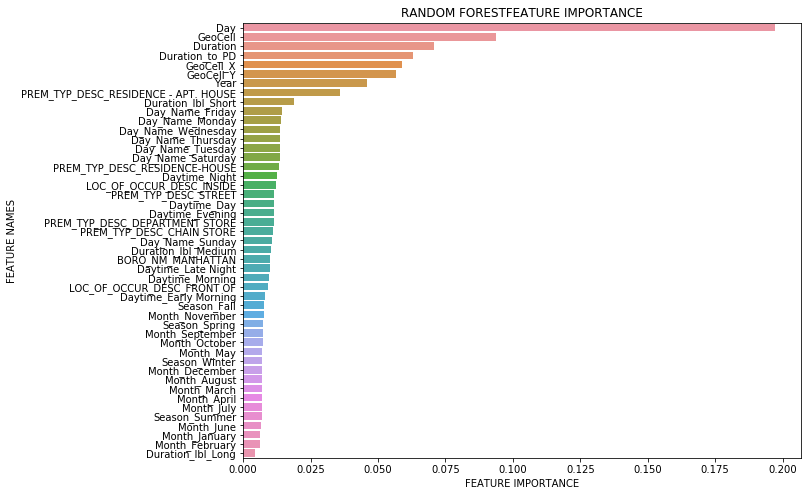

In [15]:
#Plot feature importance by GINI
plot_feature_importance(rf.feature_importances_,X_train.columns,'RANDOM FOREST')

Function below shows our gini importance numbers by feature. We see the optimal cut off level by mean gini importance is 0.0042

In [16]:
#Check out actual feature names associated with their gini score
print ("Features sorted by their score:")
print (sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), X_train.columns), 
             reverse=True))

#Optimal cut off is at 0.006 for this RF Model

Features sorted by their score:
[(0.197, 'Day'), (0.0938, 'GeoCell'), (0.0706, 'Duration'), (0.0628, 'Duration_to_PD'), (0.0587, 'GeoCell_X'), (0.0566, 'GeoCell_Y'), (0.0459, 'Year'), (0.0358, 'PREM_TYP_DESC_RESIDENCE - APT. HOUSE'), (0.0187, 'Duration_lbl_Short'), (0.0143, 'Day_Name_Friday'), (0.0139, 'Day_Name_Monday'), (0.0138, 'Day_Name_Wednesday'), (0.0136, 'Day_Name_Thursday'), (0.0135, 'Day_Name_Tuesday'), (0.0135, 'Day_Name_Saturday'), (0.0133, 'PREM_TYP_DESC_RESIDENCE-HOUSE'), (0.0125, 'Daytime_Night'), (0.012, 'LOC_OF_OCCUR_DESC_INSIDE'), (0.0116, 'PREM_TYP_DESC_STREET'), (0.0114, 'Daytime_Day'), (0.0113, 'PREM_TYP_DESC_DEPARTMENT STORE'), (0.0113, 'Daytime_Evening'), (0.0111, 'PREM_TYP_DESC_CHAIN STORE'), (0.0106, 'Day_Name_Sunday'), (0.0102, 'Duration_lbl_Medium'), (0.0099, 'BORO_NM_MANHATTAN'), (0.0098, 'Daytime_Late Night'), (0.0094, 'Daytime_Morning'), (0.0092, 'LOC_OF_OCCUR_DESC_FRONT OF'), (0.008, 'Daytime_Early Morning'), (0.0077, 'Season_Fall'), (0.0076, 'Month_Novem

Here we have a simple function to display the same gini importance above, but in a cleaner dataframe related look.

In [17]:
#Get feature importance
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X_test.columns, rf.feature_importances_):
    feats[feature] = importance #add the name/value pair 
    
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})

#Assort by importance > 0.0042
df_top_features = importances[importances['Gini-importance']>=.0042]
df_top_features['feature'] = df_top_features.index
top_features = df_top_features['feature'].tolist()

df_top_features.sort_values(by='Gini-importance',ascending=False)

C:\Users\Aurian\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,Gini-importance,feature
Day,0.197033,Day
GeoCell,0.093826,GeoCell
Duration,0.070618,Duration
Duration_to_PD,0.062846,Duration_to_PD
GeoCell_X,0.058746,GeoCell_X
GeoCell_Y,0.056618,GeoCell_Y
Year,0.045883,Year
PREM_TYP_DESC_RESIDENCE - APT. HOUSE,0.035840,PREM_TYP_DESC_RESIDENCE - APT. HOUSE
Duration_lbl_Short,0.018732,Duration_lbl_Short
Day_Name_Friday,0.014285,Day_Name_Friday


### Modeling and Evaluation 2

Here we will important our confusion matrix metrics to see our weighted averages of both the train/test dataset and holdout set.  

The metrics of interest we are trying to focus on the most is precision, recall, and average. This will allow us to get the necessary information to explain the importance and robustness of our model.

In [18]:
#Random Forest Model
from sklearn.metrics import *

#Create predictions for test and holdout
y_pred = rf.predict(X_test)
y_hold_pred = rf.predict(X_holdout)

#Classification matrix
print('Confusion Matrix for Train/Test')
print('--------------------------------')
print(classification_report(y_test,y_pred))
print('Confusion Matrix for Holdout')
print('--------------------------------')
print(classification_report(y_holdout,y_hold_pred))

Confusion Matrix for Train/Test
--------------------------------
              precision    recall  f1-score   support

           0       0.77      0.84      0.80     72942
           1       0.56      0.43      0.49     32833

    accuracy                           0.72    105775
   macro avg       0.66      0.64      0.65    105775
weighted avg       0.70      0.72      0.71    105775

Confusion Matrix for Holdout
--------------------------------
              precision    recall  f1-score   support

           0       0.77      0.85      0.81     40568
           1       0.56      0.43      0.49     18196

    accuracy                           0.72     58764
   macro avg       0.66      0.64      0.65     58764
weighted avg       0.70      0.72      0.71     58764



Now that we see our model fits nicely with our holdout set, we will run a 10-fold cross validation to see how well our model will perform on other train test splits. If we get skewed accuracy results, then that means we may have overfit our model and need to go back to our data preparation and feature selection steps to see where the issue resides.  

We can observe that the cross validation method checks out and can continue forward with our ROC curve.

In [28]:
#10 fold Cross validation of model fit
ten_fold = cross_val_score(rf, X_train, y_train.values.ravel(), cv=10)
print('Results of 10 Fold Cross Validation')
print(ten_fold)
print('--------------------------------')
print('Average of 10 Fold Cross Validation')
print(np.mean(ten_fold))

Results of 10 Fold Cross Validation
[0.71727724 0.71654455 0.71822264 0.71666273 0.71571732 0.72079887
 0.71668636 0.72056251 0.71734146 0.71417429]
--------------------------------
Average of 10 Fold Cross Validation
0.717398798193697


Here we run our ROC curve and see a pretty okay curve. Next steps will be to optimize our parameters to find the best fit parameters for our model. From there, we can re-run our model + ROC curve to observe any changes.

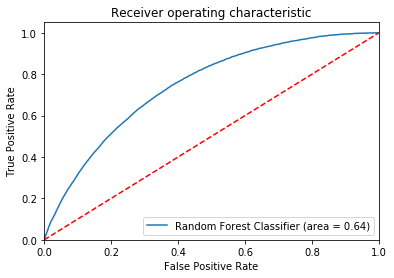

In [19]:
#ROC Curve for Random Forest
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest Classifier (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

Here we import the statsmodel api for our logistic model fit.  

We will fit our model with the good columns we identified above earlier.  

We can observe a lot of NaN's which is in part of many correlated variables which is skewing our p-value scores. We will continue by keeping the top 20 featues associated by gini importance

In [52]:
#Logistic Reg using stats model API
import statsmodels.api as sm

#Keep top 20 features associated by gini importance
good_cols = ['Duration', 'Duration_to_PD', 'Day', 'Year', 'GeoCell', 'GeoCell_X',
       'GeoCell_Y', 'BORO_NM_MANHATTAN', 'LOC_OF_OCCUR_DESC_FRONT OF',
       'LOC_OF_OCCUR_DESC_INSIDE', 'PREM_TYP_DESC_CHAIN STORE',
       'PREM_TYP_DESC_DEPARTMENT STORE',
       'PREM_TYP_DESC_RESIDENCE - APT. HOUSE', 'PREM_TYP_DESC_RESIDENCE-HOUSE',
       'PREM_TYP_DESC_STREET', 'Day_Name_Friday', 'Day_Name_Monday',
       'Day_Name_Saturday', 'Day_Name_Sunday', 'Day_Name_Thursday',
       'Day_Name_Tuesday', 'Day_Name_Wednesday', 'Month_April', 'Month_August',
       'Month_December', 'Month_February', 'Month_January', 'Month_July',
       'Month_June', 'Month_March', 'Month_May', 'Month_November',
       'Month_October', 'Month_September', 'Duration_lbl_Long',
       'Duration_lbl_Medium', 'Duration_lbl_Short', 'Season_Fall',
       'Season_Spring', 'Season_Summer', 'Season_Winter', 'Daytime_Day',
       'Daytime_Early Morning', 'Daytime_Evening', 'Daytime_Late Night',
       'Daytime_Morning', 'Daytime_Night']

#Built out logistic Model
X_train = X_train[good_cols]
log_model=sm.Logit(y_train,X_train)
result=log_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.528526
         Iterations 20
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:               423098
Model:                          Logit   Df Residuals:                   423059
Method:                           MLE   Df Model:                           38
Date:                Thu, 15 Oct 2020   Pseudo R-squ.:                  0.1451
Time:                        14:28:01   Log-Likelihood:            -2.2362e+05
converged:                       True   LL-Null:                   -2.6158e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Duration                                -0.3624      0.

C:\Users\Aurian\Anaconda3\lib\site-packages\statsmodels\base\model.py:1354: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
C:\Users\Aurian\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


Here we are applying the top 20 features by gini importance only and refitting our logistic regression model.  

We can observe our results are much better outside of our "Day" predictor. This predictor may be correlated with some of the dummy "Day_Name" variables we have below. We will take "Day" out of our model since it was deemed statistically insignificant.

In [53]:
#Keep top 20 features associated by gini importance
good_cols = ['Duration', 'Duration_to_PD', 'Day', 'Year', 'GeoCell', 'GeoCell_X',
       'GeoCell_Y','Day_Name_Friday', 'Day_Name_Monday',
       'Day_Name_Saturday', 'Day_Name_Thursday',
       'Day_Name_Tuesday', 'Day_Name_Wednesday',
       'PREM_TYP_DESC_RESIDENCE - APT. HOUSE', 'PREM_TYP_DESC_RESIDENCE-HOUSE', 'Duration_lbl_Short', 'Daytime_Day', 'Daytime_Night', 'PREM_TYP_DESC_STREET', 'LOC_OF_OCCUR_DESC_INSIDE']

#Built out logistic Model
X_train = X_train[good_cols]
log_model=sm.Logit(y_train,X_train)
result=log_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.550287
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:               423098
Model:                          Logit   Df Residuals:                   423078
Method:                           MLE   Df Model:                           19
Date:                Thu, 15 Oct 2020   Pseudo R-squ.:                  0.1099
Time:                        14:28:11   Log-Likelihood:            -2.3283e+05
converged:                       True   LL-Null:                   -2.6158e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Duration                                -0.2186      0.0

Refit the model without the "Day" variable and see if we see any improvements.

In [55]:
#Logistic Model without Day
good_cols = ['Duration', 'Duration_to_PD', 'Year', 'GeoCell', 'GeoCell_X',
       'GeoCell_Y','Day_Name_Friday', 'Day_Name_Monday',
       'Day_Name_Saturday', 'Day_Name_Thursday',
       'Day_Name_Tuesday', 'Day_Name_Wednesday',
       'PREM_TYP_DESC_RESIDENCE - APT. HOUSE', 'PREM_TYP_DESC_RESIDENCE-HOUSE', 'Duration_lbl_Short', 'Daytime_Day', 'Daytime_Night', 'PREM_TYP_DESC_STREET', 'LOC_OF_OCCUR_DESC_INSIDE']

#Built out logistic Model
X_train = X_train[good_cols]
log_model=sm.Logit(y_train,X_train)
result=log_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.550289
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:               423098
Model:                          Logit   Df Residuals:                   423079
Method:                           MLE   Df Model:                           18
Date:                Thu, 15 Oct 2020   Pseudo R-squ.:                  0.1099
Time:                        14:46:06   Log-Likelihood:            -2.3283e+05
converged:                       True   LL-Null:                   -2.6158e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Duration                                -0.2186      0.0

Here we have created our logistic regression class within the sklearn library so we can leverage the use of confusion matrix's that isn't compatible with the STATSAPI library we used above.  

We observe very similar scores for both our train/test model and holdset set model. Next we will explore a 10-fold cross validation to ensure our model is robust and not overfitting.

In [57]:
#Create predictions for test and holdout
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter = 1000)

#Columns
#Set the right columns
X_train=X_train[good_cols]
X_test = X_test[good_cols]
X_holdout=newdf_holdout[good_cols]
y_holdout=newdf_holdout[['y']]

#FIT
logreg.fit(X_train, y_train.values.ravel())

#Create predictions for test and holdout
y_pred = logreg.predict(X_test)
y_hold_pred = logreg.predict(X_holdout)

#Classification matrix
print('Confusion Matrix for Train/Test')
print('--------------------------------')
print(classification_report(y_test,y_pred))
print('Confusion Matrix for Holdout')
print('--------------------------------')
print(classification_report(y_holdout,y_hold_pred))

Confusion Matrix for Train/Test
--------------------------------
              precision    recall  f1-score   support

           0       0.76      0.88      0.81     72942
           1       0.58      0.38      0.46     32833

    accuracy                           0.72    105775
   macro avg       0.67      0.63      0.64    105775
weighted avg       0.70      0.72      0.70    105775

Confusion Matrix for Holdout
--------------------------------
              precision    recall  f1-score   support

           0       0.76      0.88      0.82     40568
           1       0.59      0.38      0.46     18196

    accuracy                           0.73     58764
   macro avg       0.67      0.63      0.64     58764
weighted avg       0.71      0.73      0.71     58764



Our 10-fold cross validation results hold well and we can comfortably move forward with this model.

In [60]:
#10 fold Cross validation of model fit
ten_fold = cross_val_score(logreg, X_train, y_train.values.ravel(), cv=10)
print('Results of 10 Fold Cross Validation')
print(ten_fold)
print('--------------------------------')
print('Average of 10 Fold Cross Validation')
print(np.mean(ten_fold))

Results of 10 Fold Cross Validation
[0.72181517 0.72297329 0.71593004 0.72167336 0.72193335 0.71713543
 0.72190971 0.72448594 0.72325037 0.7156397 ]
--------------------------------
Average of 10 Fold Cross Validation
0.7206746369417885


Here we plot out ROC curve for the logistic regression model.  

Next steps is to utilize the use of hyperparameters. We will find the most optimal parameters in the next iteration to see if we can improve our metrics.

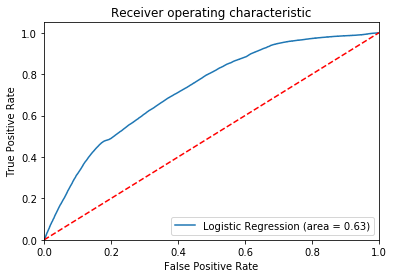

In [61]:
#ROC Curve

lm_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % lm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

### Modeling and Evaluation 3

#### Hyperparameter Tuning